In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('words_measures.csv')
df.head()

,word,ONs,PC
0,మైనా,21,33.593131
1,వ్యక్తి,14,32.862359
2,ఇచ్చి,80,27.483934
3,జ్ఞానం,5,40.975223
4,రక్తం,36,30.866758


In [18]:
predefined_clusters = {
    "V. CV":
    "ఒక, అని, ఇది, అది, అనే, అవి, ఇవి, అను, ఒకే, ఆమె, ఇలా, అదే, అలా, ఎలా, ఏదో, అతి, ఆయా, ఇక, ఇదే, ఏమి, ఆరు, ఏది, అటు, ఆట, ఐదు",
    "V. CCV / V. C1C­2V":
    "ఎన్ని, అన్నీ, అమ్మ, ఇల్లు, ఇచ్చి, ఒక్క, ఇట్టి, ఎత్తు, అంటే, ఉంది, ఎంత, ఇంకా, ఏంటో, అంత, ఇంత, ఉంటే, అంటూ, ఇట్లు, అందు, ఇంకో, ఇంటి, ఇంట్లో, ఇట్లు, అంటూ, ఉండి",
    "CVN.CV Cvm.CV / CV. CVm­":
    "రెండు, నుంచి, ముందు, కొంత, వంట, మంది, కింది, కాంతి, కంటే, రెండో, రంగు, చెంది, బంతి, శాంతి, ముందే, హిందీ, గుండె, పంట, మందు, కాలం, భాగం, శతం, పటం, దూరం, పాపం",
    "CV.C1C1V":
    "పెద్ద, యొక్క, చిన్న, వచ్చి, బట్టి, నన్ను, కొత్త, దాన్ని, వచ్చే, వద్ద, తల్లి, తప్పు, డబ్బు, నువ్వు, వాళ్లు, గొప్ప, పెట్టి, చుట్టూ, పన్ను, మొక్క, నిన్ను, కళ్లు, చెప్పు, పెళ్లి, జిల్లా",
    "CV.C1C2V(m)":
    "మధ్య, మాత్రం, శక్తి, ముఖ్య, మార్పు, పూర్తి, చర్య, గూర్చి, ఖర్చు, చూస్తే, భార్య, పాత్ర, సార్లు, కాస్త, శబ్దం, పేర్లు, భర్త, పూర్వం, విద్య, రక్తం, పట్ల, బోర్డు, మార్చి, తూర్పు, వస్తే",
    "CV.CV":
    "తన, మన, తమ, పని, తల, తను, మైనా, పది, గత, కవి, ములు, మత, విని, వలె, కొని, మని, నది, పడి, ధర, గదా, సరి, పద, కళ, కల, సమ",
    "CVV.CV":
    "నేను, కాదు, లేక, మూడు, మీరు, పేజీ, నాకు, కూడా, కానీ, బాగా, చేసి, పేరు, చాలా, మాట, వేరు, మీకు, వాడు, చూసి, గాలి, నీకు, లేవు, రాజు, వాడి, మూల, వేల",
    "C1C2V.CV":
    "ప్రతి, క్రింది, శ్రమ, దృష్టి, ప్రేమ, వ్యాధి, ప్రశ్న, క్రమం, న్యాయం, క్రొత్త, స్థితి, వృద్ధి, ద్వారా, జ్ఞానం, వ్యాప్తి, వ్యక్తి, స్వయం, స్పష్టం, ప్రభ, త్యాగం, ప్రాయం, గ్రహం, ప్రాప్తి, ప్రాంతం, వ్రాత",
}

In [19]:
def get_predefined_cluster(word):
	for cluster, words in predefined_clusters.items():
		if word in words.split(', '):
			return cluster
	print(f"unknown cluster for {word}")
	return "unknown"

df['predefined_clusters'] = df['word'].map(get_predefined_cluster)
df.head()

# # count unknown
# df['predefined_clusters'].value_counts()

,word,ONs,PC,predefined_clusters
0,మైనా,21,33.593131,CV.CV
1,వ్యక్తి,14,32.862359,C1C2V.CV
2,ఇచ్చి,80,27.483934,V. CCV / V. C1C­2V
3,జ్ఞానం,5,40.975223,C1C2V.CV
4,రక్తం,36,30.866758,CV.C1C2V(m)


In [20]:
import matplotlib
# matplotlib.use('module://mplcairo.qt')
plt.style.use('ggplot')


from pathlib import Path
TELUGU_FONT = Path('fonts/NotoSansTelugu-Regular.ttf')


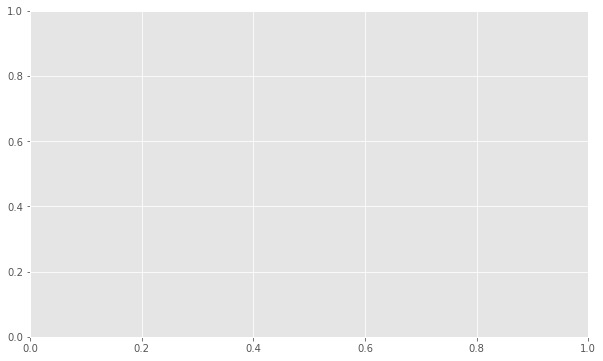

/home/soham/apps/miniconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/soham/apps/miniconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 112 missing from current font.
  font.set_text(s, 0.0, flags=flags)


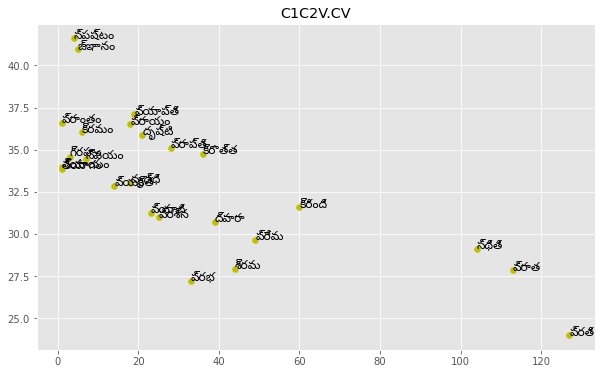

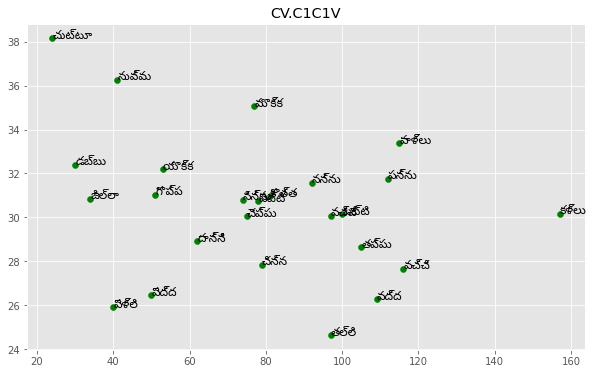

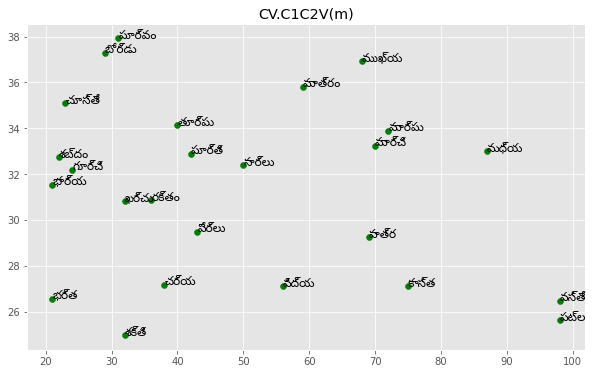

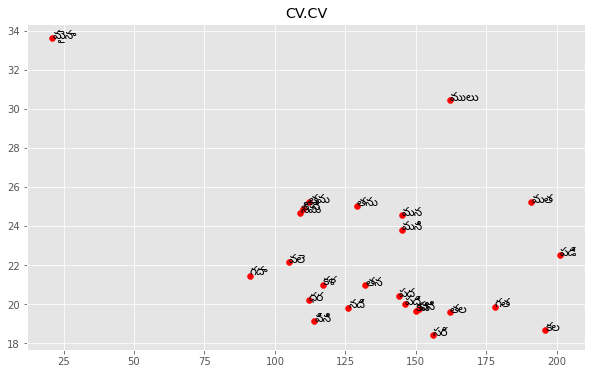

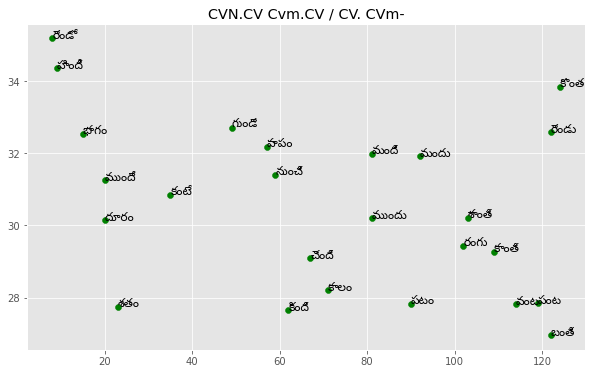

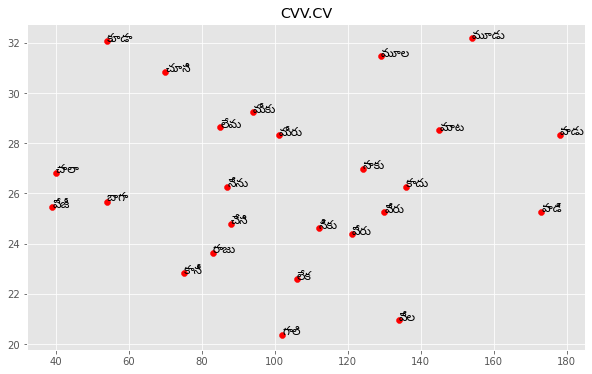

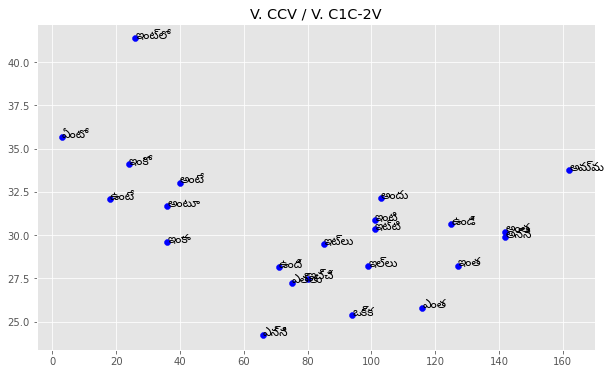

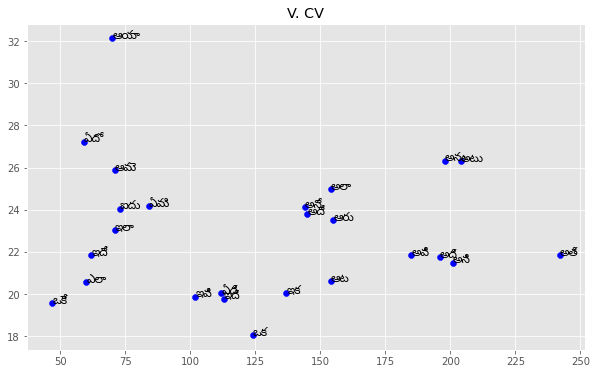

In [21]:
# plot predefined clusters as a scatter plot

fig, ax = plt.subplots(figsize=(10,6))

def get_color(cluster):
	if cluster in ["V. CV", "V. CCV / V. C1C­2V"]:
		return 'b'
	elif cluster in ["CVN.CV Cvm.CV / CV. CVm­", "CV.C1C1V", "CV.C1C2V(m)"]:
		return 'g'
	elif cluster in ["CV.CV", "CVV.CV"]:
		return 'r'
	elif cluster in ["C1C2V.CV"]:
		return 'y'
	else:
		return 'k'

for cluster, group in df.groupby('predefined_clusters'):
	# ax.scatter(group['ONs'], group['PC'], label=cluster)
	fig, ax = plt.subplots(figsize=(10,6))
	plt.title(cluster)
	ax.scatter(group['ONs'], group['PC'], label=cluster, c=get_color(cluster))
	for i, txt in enumerate(group['word']):
		ax.annotate(txt, (group['ONs'].iloc[i], group['PC'].iloc[i]), family=['Noto Sans Telugu'], fontsize=12)
	plt.show()

ax.set_xlabel('ONs')
ax.set_ylabel('PC')
ax.legend()
plt.show()

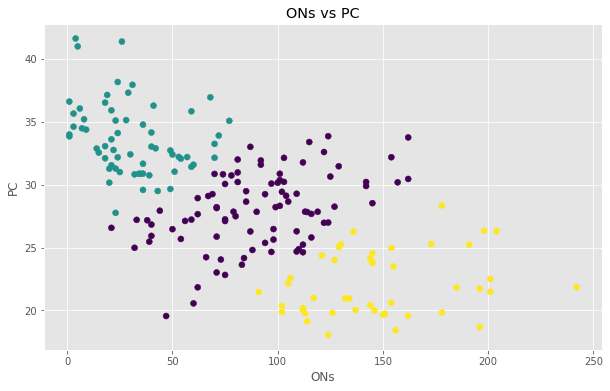

In [29]:
# cluster words by ONs and PC

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df[['ONs', 'PC']]
scaler = StandardScaler()
X = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(X)

# plot clusters
plt.figure(figsize=(10,6))
plt.scatter(df['ONs'], df['PC'], c=df['cluster'])
plt.xlabel('ONs')
plt.ylabel('PC')
plt.title('ONs vs PC')
plt.show()